In [1]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
repositorio = "https://github.com/reflex-dev/reflex.git"

In [3]:
commits = []

for commit in Repository(repositorio).traverse_commits():
    record = {
        'hash': commit.hash,
        'message': commit.msg,
        'author_name': commit.author.name,
        'author_email': commit.author.email,
        'author_date': commit.author_date,
        'committer_name': commit.committer.name,
        'committer_email': commit.committer.email,
        'committer_date': commit.committer_date,
       
            }
    commits.append(record)

# Save it to FileCommits.csv
df_commits = pd.DataFrame(commits)

In [4]:
df_commits.to_csv('DF Commits Reflex.csv', index=False)

In [2]:
df_commits = pd.read_csv("DF Commits Reflex.csv")

In [7]:
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,e8e8eaa010f08ed4b0c7a3b773cd8cbf68018f97,Initial commit.,Nikhil Rao,nikhil@pynecone.io,2022-11-18 04:47:00-08:00,Nikhil Rao,nikhil@pynecone.io,2022-11-18 12:44:06-08:00
1,bbdc4a08fd69151399a97a45fd79be7f22a1bc39,Update README.md,Alek Petuskey,17petuskey@berkeley.edu,2022-11-18 17:43:39-08:00,GitHub,noreply@github.com,2022-11-18 17:43:39-08:00
2,3dbf7d713973a00b69fa7d99a6e3ca0775729370,Delete Counter.gif,Alek Petuskey,17petuskey@berkeley.edu,2022-11-18 17:43:53-08:00,GitHub,noreply@github.com,2022-11-18 17:43:53-08:00
3,b1c10d3adac55acecd01783d84355293823b10ac,Added counter gif,Alek Petuskey,alek@pynecone.io,2022-11-18 17:44:47-08:00,GitHub,noreply@github.com,2022-11-18 17:44:47-08:00
4,2008417bd7e1f40094efd00521f56e6f535ce8ed,Clean up tags.,Nikhil Rao,nikhil@pynecone.io,2022-11-18 13:04:16-08:00,Nikhil Rao,nikhil@pynecone.io,2022-11-18 17:48:51-08:00
...,...,...,...,...,...,...,...,...
1839,b1d449897a14d3c0646f08ed3b0809f314923544,unionize base var fields types (#4153)\n\n* un...,Khaleel Al-Adhami,khaleel.aladhami@gmail.com,2024-10-11 17:27:15-07:00,GitHub,noreply@github.com,2024-10-11 17:27:15-07:00
1840,b2d2719f90d5d71b88ac3f2dd8c8d39b72e49e07,add type hinting to events (#4145)\n\n* add ty...,Khaleel Al-Adhami,khaleel.aladhami@gmail.com,2024-10-14 08:44:31-07:00,GitHub,noreply@github.com,2024-10-14 08:44:31-07:00
1841,1d268f8b135b3d5acce8c64cd7833d3796975b16,Support aria and data props (#4149)\n\n* Suppo...,Masen Furer,m_github@0x26.net,2024-10-14 08:45:25-07:00,GitHub,noreply@github.com,2024-10-14 08:45:25-07:00
1842,d6797a1f1d764a74bc9283f753a9b0d5702cd9b9,Change the defalut direction of radio group (#...,Manoj Bhat,99398172+Manojvbhat@users.noreply.github.com,2024-10-14 21:05:38+05:18,GitHub,noreply@github.com,2024-10-14 08:47:38-07:00


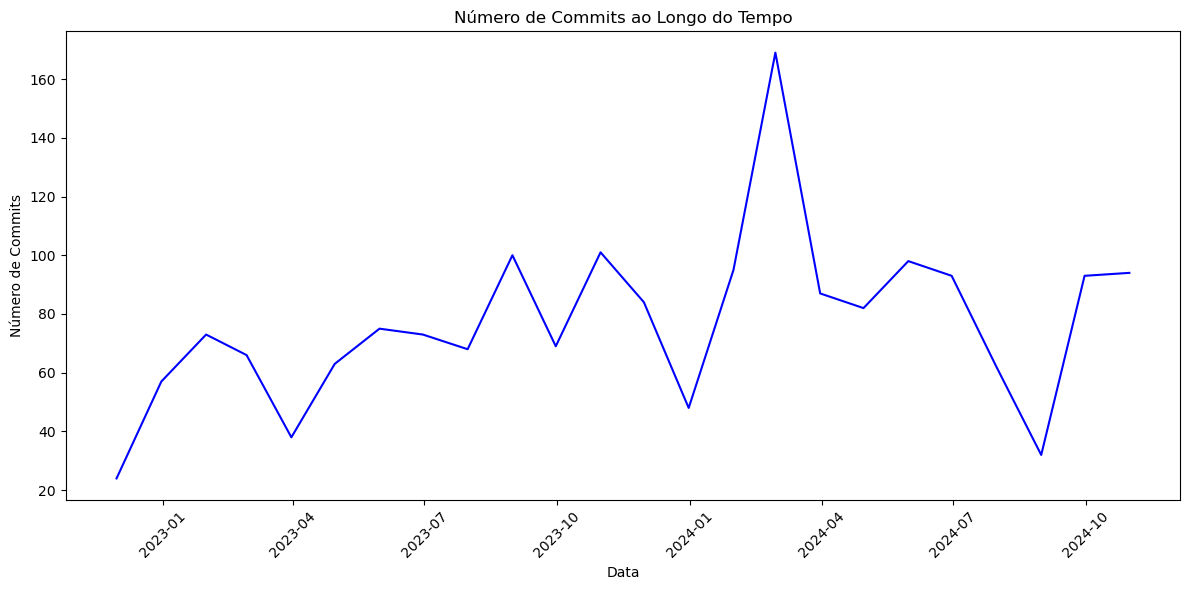

In [3]:
# Converter a coluna de data para datetime com timezone UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Remover linhas onde a conversão falhou (se houver)
df_commits = df_commits.dropna(subset=['author_date'])

# Definir a coluna de data como índice
df_commits.set_index('author_date', inplace=True)

# Agrupar por mês e contar o número de commits
monthly_pull_requests = df_commits.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Commits')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'author_date'


C:\Users\Adriano\AppData\Local\Temp\ipykernel_18592\1909926089.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_commits['year_month'] = df_commits['author_date'].dt.to_period('M')


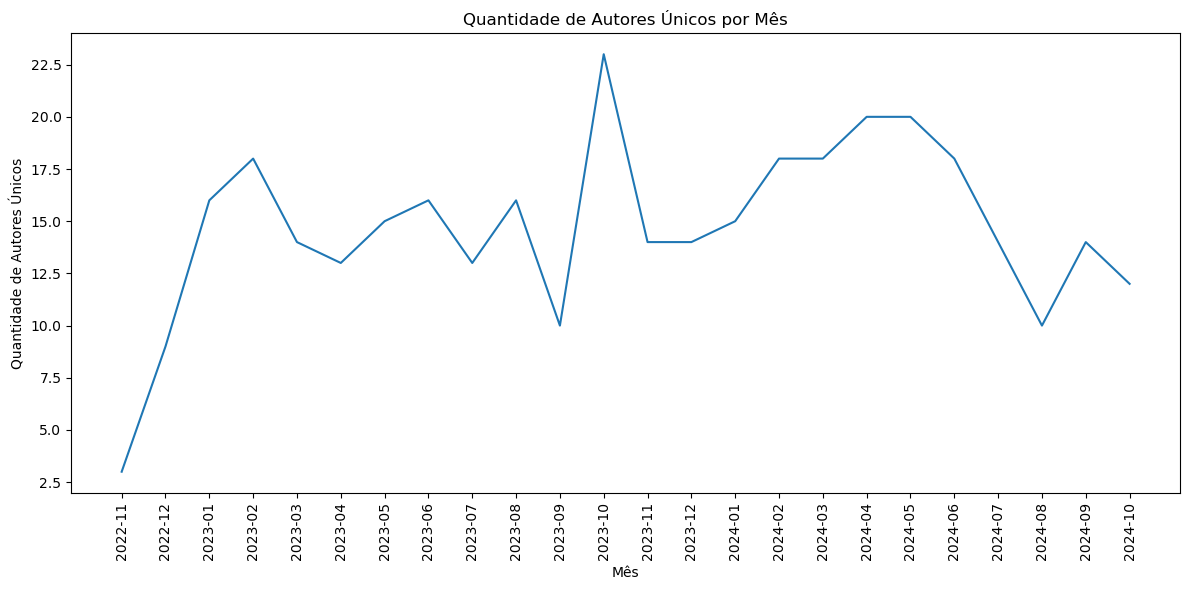

In [4]:
# Converter a coluna 'author_date' para datetime com fuso horário UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['author_date'].isnull().sum(), "valores inválidos em 'author_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['author_date'])

# Extrair o ano e o mês da coluna 'author_date'
df_commits['year_month'] = df_commits['author_date'].dt.to_period('M')

# Contar o número de autores únicos por mês
authors_per_month = df_commits.groupby('year_month')['author_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_month.index.astype(str), authors_per_month.values, marker='', linestyle='-')
plt.title('Quantidade de Autores Únicos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(rotation=90)  # Rotacionar para facilitar a leitura
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

0 valores inválidos em 'committer_date'


C:\Users\Adriano\AppData\Local\Temp\ipykernel_18592\762567147.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_commits['year_month'] = df_commits['committer_date'].dt.to_period('M')


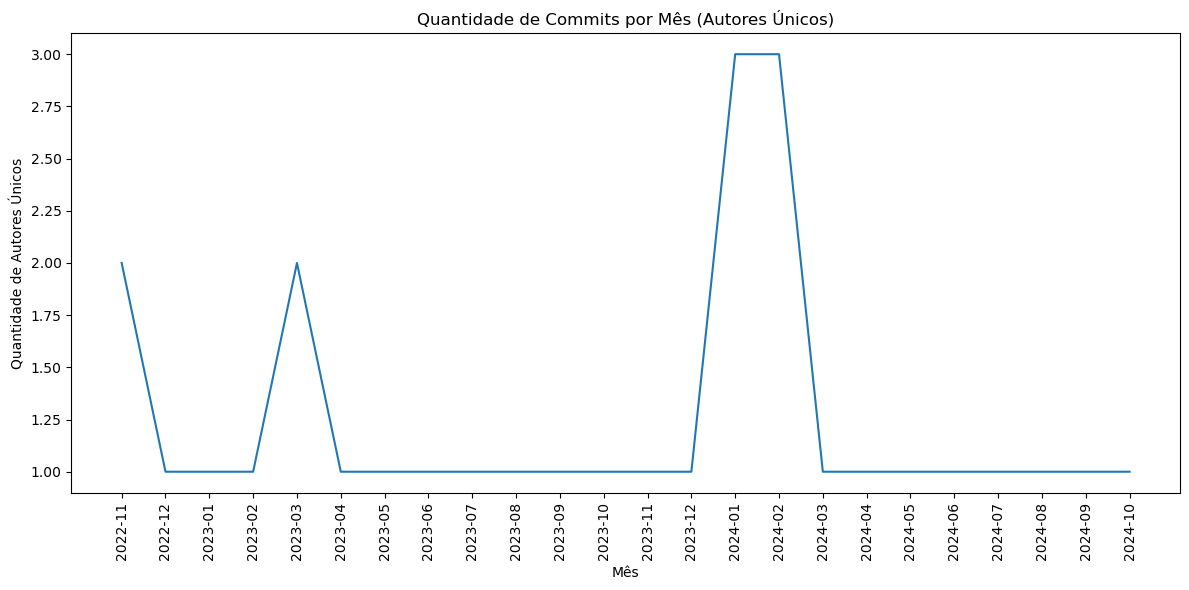

In [5]:
# Converter a coluna 'committer_date' para datetime com fuso horário UTC
df_commits['committer_date'] = pd.to_datetime(df_commits['committer_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['committer_date'].isnull().sum(), "valores inválidos em 'committer_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['committer_date'])

# Extrair o ano e o mês da coluna 'committer_date'
df_commits['year_month'] = df_commits['committer_date'].dt.to_period('M')

# Contar o número de autores (committer_email) únicos por mês
authors_per_month = df_commits.groupby('year_month')['committer_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_month.index.astype(str), authors_per_month.values, marker='', linestyle='-')
plt.title('Quantidade de Commits por Mês (Autores Únicos)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(rotation=90)  # Rotacionar as etiquetas dos meses para melhor visualização
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()